In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Our ML tools ---
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # <-- The MUST-HAVE for KNN
from sklearn.neighbors import KNeighborsClassifier

# --- Our Evaluation tools ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Load the Data ---
iris = load_iris()
X = iris.data   # The 4 features
y = iris.target # The 3 species (0, 1, or 2)



--- Here's a peek at our data ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

--- Let's check for missing values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 n

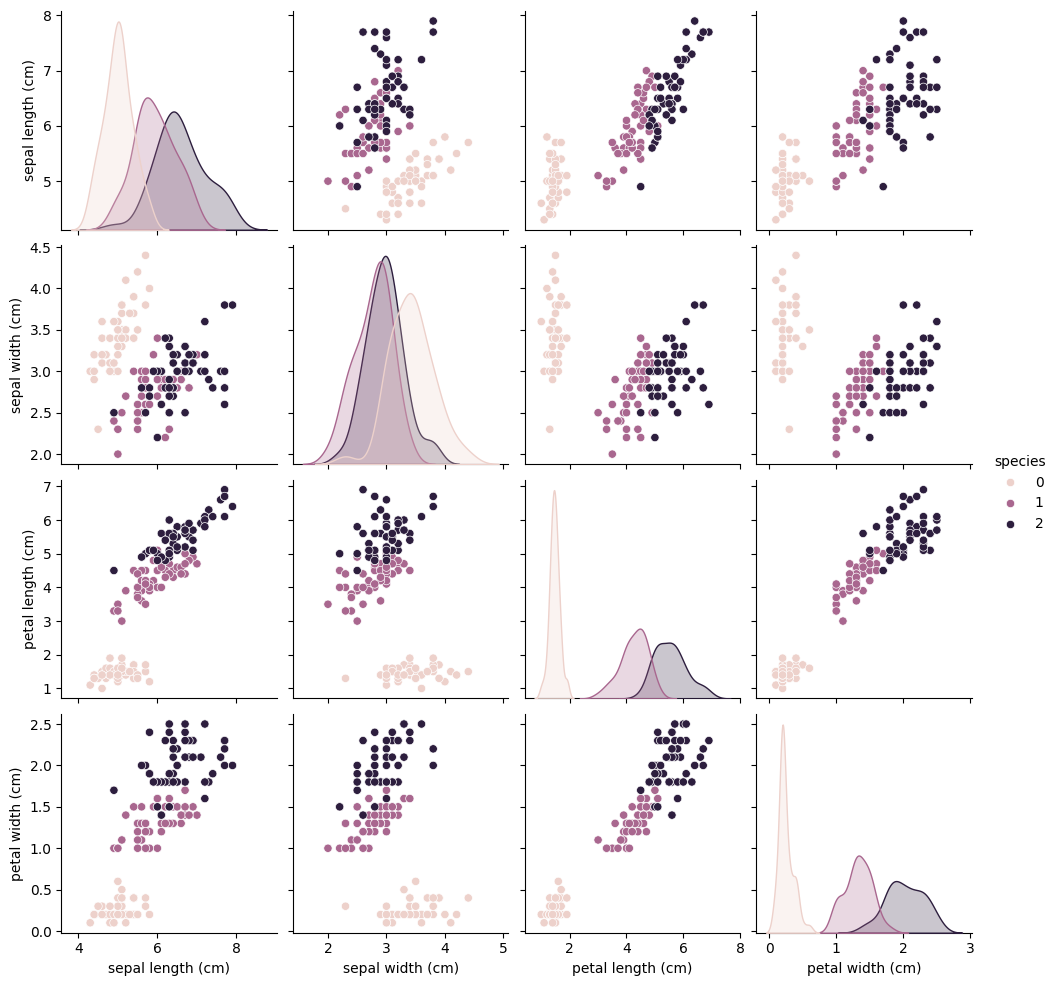

In [2]:

# --- 2. Explore the Data (EDA) ---
# Let's put it in a DataFrame to see it
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y # 'species' is our 'y' (target)

print("--- Here's a peek at our data ---")
print(df.head())

print("\n--- Let's check for missing values ---")
print(df.info()) # No missing values! Clean dataset.

# This is the BEST plot for KNN. It lets us SEE the clusters.
# 'hue="species"' tells seaborn to color the dots by their species.
sns.pairplot(df, hue='species')
plt.show()

In [3]:

# --- 3. Prepare the Data ---
# X and y are already defined
# The GOLDEN RULE!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vijay: "Wait, why are we scaling? The numbers look small."
# AK: "Good question! Even if they're small, 'petal length' (1-7)
# has a *bigger range* than 'petal width' (0.1-2.5). This will
# make the model *unfairly* care more about length.
# StandardScaler puts *all* features on the *exact same scale*
# so the distance measurement is fair. This is NOT optional for KNN!"

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Remember: only .transform() on test set!



In [5]:

# --- 4. Create & Train the Model ---
# 1. Import (already done)
# 2. Create an "instance"
#    Let's pick 'K=5'. 5 neighbors. It's a good starting guess.
model = KNeighborsClassifier(n_neighbors=5)

# 3. TRAIN!
# Remember, this step is a bit of a "fake". It's just memorizing the data.
print("\n...Memorizing the data...")
model.fit(X_train_scaled, y_train)
print("...Memorization complete!...")




...Memorizing the data...
...Memorization complete!...


In [6]:
# --- 5. Predict & Evaluate ---
# 4. Predict
# THIS is where all the real work happens. It's calculating
# all the distances for the X_test_scaled points.
print("...Calculating distances and voting...")
y_pred = model.predict(X_test_scaled)

# 5. Evaluate (Get the score!)
print("\n--- Model Evaluation ---")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%") # Should be 100% or close!

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

...Calculating distances and voting...

--- Model Evaluation ---
Accuracy: 100.00%

--- Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

